In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# importing data

df = pd.read_csv("/content/drive/MyDrive/online_course_engagement_data.csv")

In [4]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [5]:
df.shape

(9000, 9)

In [6]:
df.nunique()

UserID                   8123
CourseCategory              5
TimeSpentOnCourse        8123
NumberOfVideosWatched      21
NumberOfQuizzesTaken       11
QuizScores               8123
CompletionRate           8123
DeviceType                  2
CourseCompletion            2
dtype: int64

In [7]:
df.dtypes

UserID                     int64
CourseCategory            object
TimeSpentOnCourse        float64
NumberOfVideosWatched      int64
NumberOfQuizzesTaken       int64
QuizScores               float64
CompletionRate           float64
DeviceType                 int64
CourseCompletion           int64
dtype: object

In [10]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [11]:
df.isnull().sum() #There are no null values

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

#EDA

In [12]:
df.nunique()

UserID                   8123
CourseCategory              5
TimeSpentOnCourse        8123
NumberOfVideosWatched      21
NumberOfQuizzesTaken       11
QuizScores               8123
CompletionRate           8123
DeviceType                  2
CourseCompletion            2
dtype: int64

In [13]:
df.drop(['UserID'],axis=1,inplace=True)

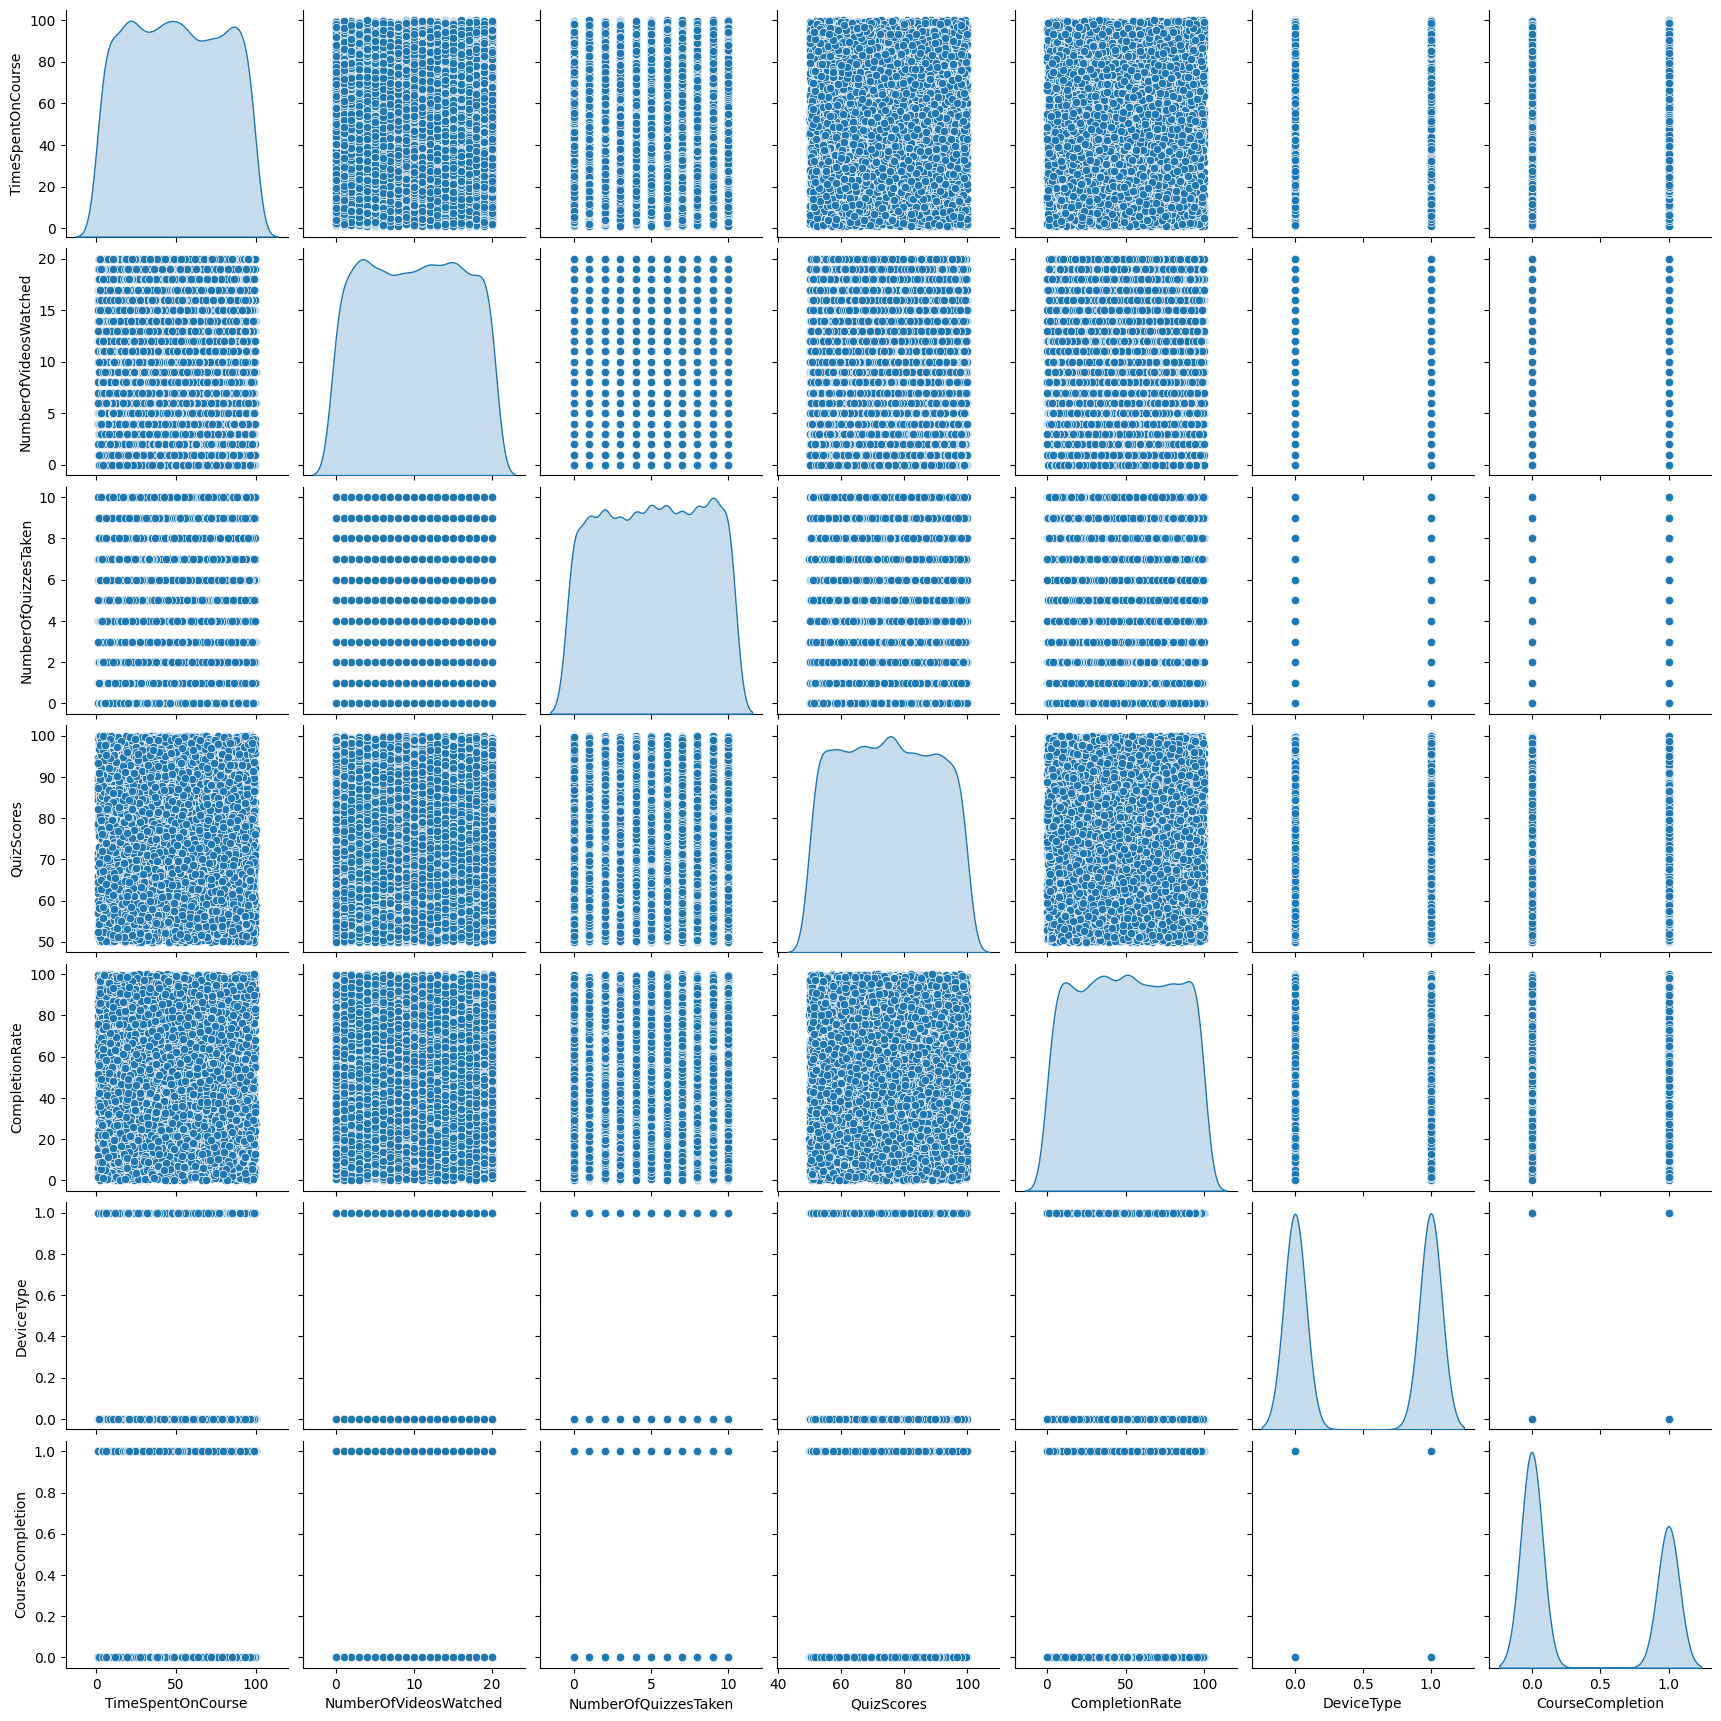

In [14]:
sns.pairplot(df,diag_kind='kde')
plt.show()

##Target Variable is Course Completion

CourseCompletion
0    60.355556
1    39.644444
Name: proportion, dtype: float64



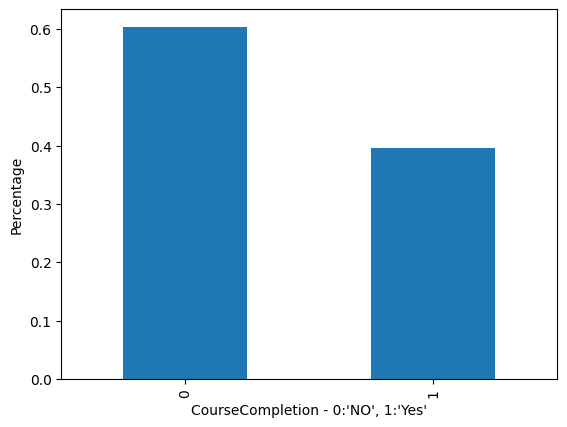

In [16]:
print(df['CourseCompletion'].value_counts(normalize=True)*100)
print()
df['CourseCompletion'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("CourseCompletion - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

##Split the data into training and test set in the ratio of 70:30 respectively

In [18]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'CourseCompletion']  # independent variables

y = df.loc[:, df.columns == 'CourseCompletion']  # Target variable

In [19]:
x = pd.get_dummies(x,drop_first=True)

In [20]:
y.head()

,CourseCompletion
0,0
1,0
2,1
3,1
4,0


In [21]:
x.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,29.979719,17,3,50.365656,20.860773,1,False,True,False,False
1,27.802640,1,5,62.615970,65.632415,1,False,False,False,False
2,86.820485,14,2,78.458962,63.812007,1,False,False,False,False
3,35.038427,17,10,59.198853,95.433162,0,False,False,False,True
4,92.490647,16,0,98.428285,18.102478,0,False,False,True,False


In [22]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [23]:
xtrain.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
8561,96.012957,13,6,68.931121,71.814452,1,False,False,False,True
6670,14.584506,6,9,84.789429,78.972593,1,False,False,False,False
2919,97.720134,15,1,65.520513,17.650199,1,True,False,False,False
4725,48.701888,15,4,62.239053,8.757960,1,False,False,True,False
4628,57.149290,14,7,77.018156,70.962740,1,False,False,True,False


In [24]:
xtest.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
4645,36.173675,10,7,80.868559,11.304711,0,True,False,False,False
4205,66.032430,18,9,75.910571,72.582701,1,True,False,False,False
2896,75.258323,7,8,72.089223,47.865499,0,False,False,False,False
6617,72.316948,19,9,89.969266,57.173671,1,False,False,True,False
5889,77.756260,12,9,54.641960,34.017770,1,False,False,False,True


In [25]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(random_state=7)

In [27]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Training accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Training accuracy 0.7942592592592592

Testing accuracy 0.7988888888888889


 Here the model performs better in testing than training. Therefore, it is a good model

In [28]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## importing necessary metrics to evaluate model performance

In [29]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

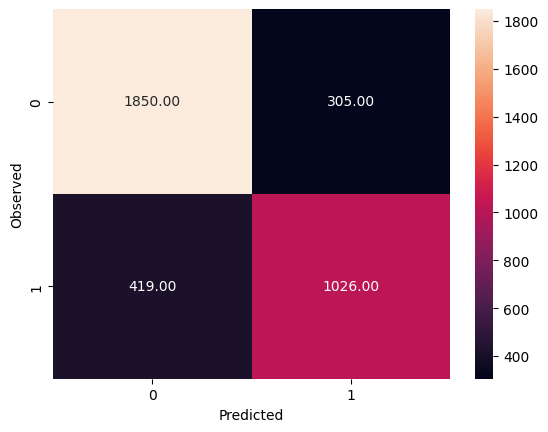

In [30]:
draw_cm(ytest,y_predict)

In [31]:
recall_score(ytest,y_predict)

0.7100346020761246

In [32]:
precision_score(ytest,y_predict)

0.7708489857250188

In [33]:
f1_score(ytest,y_predict)

0.7391930835734871

In [34]:
roc_auc_score(ytest,y_predict)

0.7842516397851621

In [35]:
!pip install yellowbrick

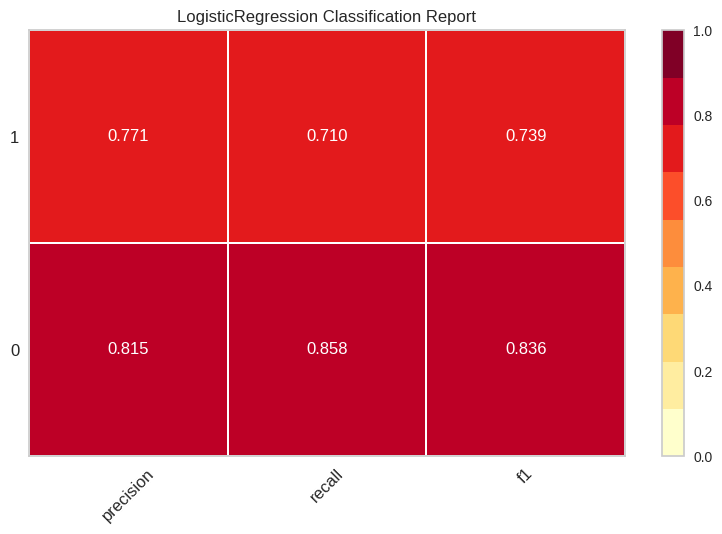

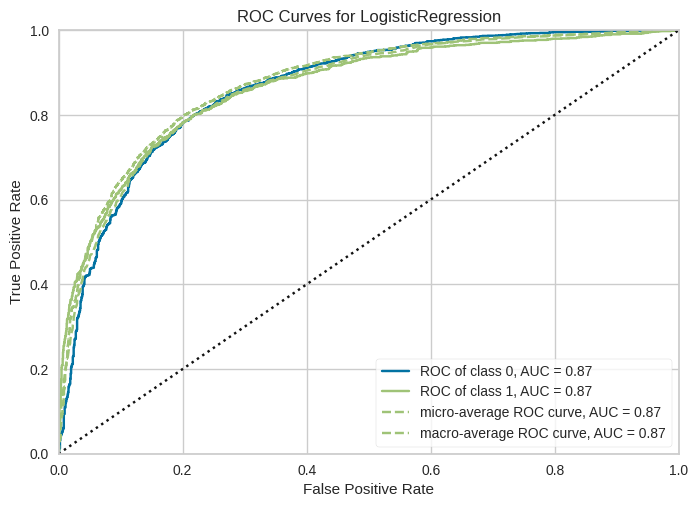

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

In [37]:
## Feature Importance or Coefficients
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CourseCategory_Programming,0.48
9,CourseCategory_Science,0.41
7,CourseCategory_Health,0.32
2,NumberOfQuizzesTaken,0.29
6,CourseCategory_Business,0.29
1,NumberOfVideosWatched,0.13
3,QuizScores,0.06
4,CompletionRate,0.03
5,DeviceType,0.03
0,TimeSpentOnCourse,0.02


In [38]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Completion Status'] = ytest
z['Predicted Completion Status'] = y_predict
z[z['Observed Completion Status']!=z['Predicted Completion Status']]

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science,Observed Completion Status,Predicted Completion Status
4645,36.173675,10,7,80.868559,11.304711,0,True,False,False,False,1,0
2896,75.258323,7,8,72.089223,47.865499,0,False,False,False,False,0,1
1906,44.342154,7,9,54.109076,77.454397,1,False,False,True,False,1,0
7421,61.377005,1,5,77.174636,91.930546,0,True,False,False,False,1,0
276,67.536355,3,4,78.379319,74.767700,1,False,False,True,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4044,37.319971,6,8,59.624518,84.457051,0,False,False,False,False,1,0
3026,61.281581,10,9,67.855473,44.841447,1,False,False,False,False,0,1
152,82.166947,14,2,96.608850,40.209751,0,True,False,False,False,0,1
8909,16.695612,7,10,84.296865,61.123383,0,False,True,False,False,0,1


**Confusion matrix** means

True Positive (observed=1,predicted=1):

Predicted completion and the user completed the course

False Positive (observed=0,predicted=1):

Predicted completion and the user did not complete it

True Negative (observed=0,predicted=0):

Predicted no completion and the user did not complete it

False Negative (observed=1,predicted=0):

Predicted no completion and the user completed it

**Important Features**

Course Category,Number of Quizzes are the most important factors in influencing model's output.

Rest of the variables doesn't play any role in predicting the target variable.

**Accuracy**: The overall accuracy of your model is 78%, which means it correctly classified 78% of the course completion cases.

**Precision**: Looking at the precision (0.77) for predicted completion (class 1), we see that out of all the cases where the model predicted someone would complete the course, 77% of them actually did. This can be helpful if it's more critical to avoid incorrectly classifying someone as a course completer.

**Recall**: The recall (0.71) for actual completion (class 1) tells us that out of all the people who actually completed the course, the model correctly predicted 75% of them. This can be important if it's crucial to identify as many course completers as possible.

**F1-Score**: The F1-score (0.74) is a harmonic mean between precision and recall, providing a balanced view of how well the model performs on both metrics.




**Interpretation**:

Overall, this logistic regression model seems to be performing reasonably well with an accuracy of 78%. However, it's important to consider the costs of misclassification in this specific context.  For instance, if it's more critical to avoid falsely classifying someone as a course completer (e.g., issuing a course completion certificate to someone who didn't actually finish), then the precision (0.77) tells  that there's a 23% chance the model might make this mistake. On the other hand, if it's more important to identify as many course completers as possible, the recall (0.71) tells  that we might miss 29% of actual completers.